## Miniproyecto 2

#### Integrantes de equipo
##### David Soto 17551
##### Miguel Valle 17102

In [3]:
import math
import matplotlib.pyplot as plt
import numpy as np
import random

ModuleNotFoundError: No module named 'matplotlib'

### Ejercicio 1 - Función acumulada ponderada

Teniendo a los $F_{i}(x)$ de i de 1 a n con función de probabilidad acumulada $F(x)= \sum \limits _{i=1} ^{n} p_{i} F_{i}(x)$, para V (variable aleatoria), para todo $i, p_{i} ≥ 0, y \sum p_{i} = 1.$

Algoritmo:

<ol>
    <li>Definir cuál será el valor de n</li>
	<li>Definir la función de probabilidad acumulada $F_{i}(x)$ para i de 1 hasta n</li>
	<li>Generar I, tal que está distribuido como enteros positivos, tal que $P(I = i)= p_{i}$</li>
	<li>Para todas las alternativas, si $I=i$, obtener $Y_{i}$ a partir de $F_{i} (x)$</li>
	<li>Asignar a X como $Y_{i}$</li>
	<li>Repetir pasos 3 y 4 hasta recorrer toda I generada, así obteniendo la variable aleatoria</li>
</ol>
Demostración:

<li>$P(X ≤ x)= \sum \limits _{i=1} ^{n} P(X ≤ x│I = i)P(I = i)$</li>
<li>$P(X ≤ x)= \sum \limits _{i=1} ^{n} P(Y_{i} ≤ x)P(I = i)$</li>
<li>$P(X ≤ x)= \sum \limits _{i=1} ^{n} F_{i}(x)p_{i} $</li>
<li>$P(X ≤ x)=  F_{i} (x) $</li>


### Ejercicio 2 - Función acumulada ponderada (programa)

In [1]:
###Funcion para generar los numberos aleatorios
def pseudo(a,m):
    def inner_pseudo(x0, n):
        items = list(range(n))
        items[0] = [x0]
        for i in range(n):
            items[i] = (a * items[i-1])%m
        #Se normaliza para que quede entre 0 y 1 
        return[i/float(m) for i in items]
    return inner_pseudo 

In [2]:
n = input("Ingrese la cantidad de opciones para la funcion de masa de probabilidad")
n = int(n)
pi = []
ni = {}
ni2 = []
temp = 0
for i in range(n):
    msg = "Ingrese el valor de p"+str(i)
    p = float(input(msg))
    pi.append(p)
    if i == 0:
        ni2.append(p)
    else:
        for j in range(len(pi)):
            temp += pi[j]
        ni2.append(temp)
        temp = 0
    ni[i] = 0
print(pi)
print(ni)
print(ni2)
mi_pseudo = pseudo(m=2**31 -1, a = 7**5)
mis_randoms = mi_pseudo(x0=3, n=10000)

for x in mis_randoms:
    if x <= ni2[0]:
        ni[0] += 1
    else:
        for i in range(len(ni2)):
            if (i > 0):
                if (x < ni2[i]) and (x > ni2[i-1]):
                    ni[i] += 1

print(ni)
fig, axs = plt.subplots(2)
fig.suptitle("Resultado")
axs[0].bar(ni.keys(),pi,width=0.8)
axs[0].set_title("Funcion de masa de probabilidad")
axs[1].bar(ni.keys(), ni.values(),width=0.9)
axs[1].set_title("Variable Aleatoria")

plt.show()

Ingrese la cantidad de opciones para la funcion de masa de probabilidad4
Ingrese el valor de p00.1
Ingrese el valor de p10.4
Ingrese el valor de p20.25
Ingrese el valor de p30.25
[0.1, 0.4, 0.25, 0.25]
{0: 0, 1: 0, 2: 0, 3: 0}
[0.1, 0.5, 0.75, 1.0]
{0: 949, 1: 4019, 2: 2479, 3: 2553}


NameError: name 'plt' is not defined

### Ejercicio 3 - Valor presente neto

In [2]:
### Se hace una prueba para obtener las variables aleatorias uniformes con numpy
print(np.random.uniform(200,8440))

4029.088002309529


In [3]:
### Se realiza la funcion para generar variables aleatorias normales
def normal(mu, sigma):
    while True:
        lambdaValue = 1
        y1 = -(1/lambdaValue) * math.log(random.random())
        y2 = -(1/lambdaValue) * math.log(random.random())
        if (y2 - ((y1 - 1) ** 2) / 2) > 0:
            y1 = y2 - ((y1 - 1) ** 2) / 2
            variableU = random.random()
            if variableU <= 0.5:
                return mu + sigma * y1
            else:
                return mu - sigma * y1
    

#### Simulaciones con 100 iteraciones

In [4]:
### Se realiza la simulacion para el Proyecto del Hotel con 100 iteraciones
iteraciones = 100
porcentajeRetorno = 0.1
resultadosH = []

for simulacion in range(iteraciones): 
    valorInicial = -800
    valorInicial += normal(-800,50) / ((1 + porcentajeRetorno) ** 1) #ANIO 1
    valorInicial += normal(-800,100) / ((1 + porcentajeRetorno) ** 2) #ANIO 2
    valorInicial += normal(-700,150) / ((1 + porcentajeRetorno) ** 3) #ANIO 3
    valorInicial += normal(300,200) / ((1 + porcentajeRetorno) ** 4) #ANIO 4
    valorInicial += normal(400,200) / ((1 + porcentajeRetorno) ** 5) #ANIO 5
    valorInicial += normal(500,200) / ((1 + porcentajeRetorno) ** 6) #ANIO 6
    valorInicial += np.random.uniform(200,8440) / ((1 + porcentajeRetorno) ** 7) #ANIO 7
    
    resultadosH.append(valorInicial)

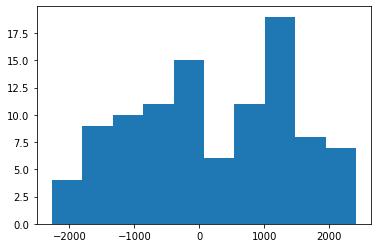

In [5]:
plt.hist(resultadosH, bins=10)
plt.show()

In [6]:
### Se realiza la simulacion para el Proyecto del Centro Comercial con 100 iteraciones
iteraciones = 100
porcentajeRetorno = 0.1
resultadosCC = []

for simulacion in range(iteraciones): 
    valorInicial = -900
    valorInicial += normal(-600,50) / ((1 + porcentajeRetorno) ** 1) #ANIO 1
    valorInicial += normal(-200,50) / ((1 + porcentajeRetorno) ** 2) #ANIO 2
    valorInicial += normal(-600,100) / ((1 + porcentajeRetorno) ** 3) #ANIO 3
    valorInicial += normal(250,150) / ((1 + porcentajeRetorno) ** 4) #ANIO 4
    valorInicial += normal(350,150) / ((1 + porcentajeRetorno) ** 5) #ANIO 5
    valorInicial += normal(400,150) / ((1 + porcentajeRetorno) ** 6) #ANIO 6
    valorInicial += np.random.uniform(1600,6000) / ((1 + porcentajeRetorno) ** 7) #ANIO 7
    
    resultadosCC.append(valorInicial)

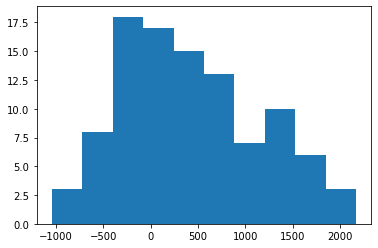

In [7]:
plt.hist(resultadosCC, bins=10)
plt.show()

#### Comparacion de VPN's obtenidas para cada proyecto

In [8]:
### Se hace un conteo de VPN para aquellas que tienen un valor Superior a 0 que determina los proyectos en los que invertir
conteoH = 0 
conteoCC = 0

for inversion in resultadosH:
    if inversion > 0:
        conteoH = conteoH + 1

for inversion in resultadosCC:
    if inversion > 0:
        conteoCC = conteoCC + 1 

print("La cantidad de veces que el Proyecto del Hotel fue rentable para invertir fue de:",conteoH,", siendo un porcentaje del:", conteoH*100/iteraciones,"% del total de simulaciones")
print("La cantidad de veces que el Proyecto del Centro comercial fue rentable para invertir fue de:",conteoCC,", siendo un porcentaje del:", conteoCC*100/iteraciones,"% del total de simulaciones")

La cantidad de veces que el Proyecto del Hotel fue rentable para invertir fue de: 52 , siendo un porcentaje del: 52.0 % del total de simulaciones
La cantidad de veces que el Proyecto del Centro comercial fue rentable para invertir fue de: 65 , siendo un porcentaje del: 65.0 % del total de simulaciones


#### Simulaciones con 1000 iteraciones

In [9]:
### Se realiza la simulacion para el Proyecto del Hotel con 1000 iteraciones
iteraciones = 1000
porcentajeRetorno = 0.1
resultadosH = []

for simulacion in range(iteraciones): 
    valorInicial = -800
    valorInicial += normal(-800,50) / ((1 + porcentajeRetorno) ** 1) #ANIO 1
    valorInicial += normal(-800,100) / ((1 + porcentajeRetorno) ** 2) #ANIO 2
    valorInicial += normal(-700,150) / ((1 + porcentajeRetorno) ** 3) #ANIO 3
    valorInicial += normal(300,200) / ((1 + porcentajeRetorno) ** 4) #ANIO 4
    valorInicial += normal(400,200) / ((1 + porcentajeRetorno) ** 5) #ANIO 5
    valorInicial += normal(500,200) / ((1 + porcentajeRetorno) ** 6) #ANIO 6
    valorInicial += np.random.uniform(200,8440) / ((1 + porcentajeRetorno) ** 7) #ANIO 7
    
    resultadosH.append(valorInicial)

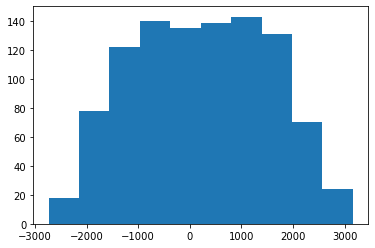

In [10]:
plt.hist(resultadosH, bins=10)
plt.show()

In [11]:
### Se realiza la simulacion para el Proyecto del Centro Comercial con 1000 iteraciones
iteraciones = 1000
porcentajeRetorno = 0.1
resultadosCC = []

for simulacion in range(iteraciones): 
    valorInicial = -900
    valorInicial += normal(-600,50) / ((1 + porcentajeRetorno) ** 1) #ANIO 1
    valorInicial += normal(-200,50) / ((1 + porcentajeRetorno) ** 2) #ANIO 2
    valorInicial += normal(-600,100) / ((1 + porcentajeRetorno) ** 3) #ANIO 3
    valorInicial += normal(250,150) / ((1 + porcentajeRetorno) ** 4) #ANIO 4
    valorInicial += normal(350,150) / ((1 + porcentajeRetorno) ** 5) #ANIO 5
    valorInicial += normal(400,150) / ((1 + porcentajeRetorno) ** 6) #ANIO 6
    valorInicial += np.random.uniform(1600,6000) / ((1 + porcentajeRetorno) ** 7) #ANIO 7
    
    resultadosCC.append(valorInicial)

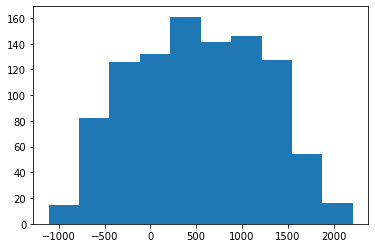

In [12]:
plt.hist(resultadosCC, bins=10)
plt.show()

#### Comparacion de VPN's obtenidas para cada proyecto

In [13]:
### Se hace un conteo de VPN para aquellas que tienen un valor Superior a 0 que determina los proyectos en los que invertir
conteoH = 0 
conteoCC = 0

for inversion in resultadosH:
    if inversion > 0:
        conteoH = conteoH + 1

for inversion in resultadosCC:
    if inversion > 0:
        conteoCC = conteoCC + 1 

print("La cantidad de veces que el Proyecto del Hotel fue rentable para invertir fue de:",conteoH,", siendo un porcentaje del:", conteoH*100/iteraciones,"% del total de simulaciones")
print("La cantidad de veces que el Proyecto del Centro comercial fue rentable para invertir fue de:",conteoCC,", siendo un porcentaje del:", conteoCC*100/iteraciones,"% del total de simulaciones")

La cantidad de veces que el Proyecto del Hotel fue rentable para invertir fue de: 555 , siendo un porcentaje del: 55.5 % del total de simulaciones
La cantidad de veces que el Proyecto del Centro comercial fue rentable para invertir fue de: 729 , siendo un porcentaje del: 72.9 % del total de simulaciones


In [14]:
### Se realiza la simulacion para el Proyecto del Hotel con 10000 iteraciones
iteraciones = 10000
porcentajeRetorno = 0.1
resultadosH = []

for simulacion in range(iteraciones): 
    valorInicial = -800
    valorInicial += normal(-800,50) / ((1 + porcentajeRetorno) ** 1) #ANIO 1
    valorInicial += normal(-800,100) / ((1 + porcentajeRetorno) ** 2) #ANIO 2
    valorInicial += normal(-700,150) / ((1 + porcentajeRetorno) ** 3) #ANIO 3
    valorInicial += normal(300,200) / ((1 + porcentajeRetorno) ** 4) #ANIO 4
    valorInicial += normal(400,200) / ((1 + porcentajeRetorno) ** 5) #ANIO 5
    valorInicial += normal(500,200) / ((1 + porcentajeRetorno) ** 6) #ANIO 6
    valorInicial += np.random.uniform(200,8440) / ((1 + porcentajeRetorno) ** 7) #ANIO 7
    
    resultadosH.append(valorInicial)

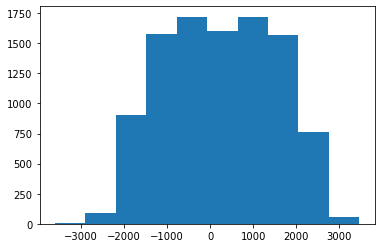

In [15]:
plt.hist(resultadosH, bins=10)
plt.show()

In [16]:
### Se realiza la simulacion para el Proyecto del Centro Comercial con 10000 iteraciones
iteraciones = 10000
porcentajeRetorno = 0.1
resultadosCC = []

for simulacion in range(iteraciones): 
    valorInicial = -900
    valorInicial += normal(-600,50) / ((1 + porcentajeRetorno) ** 1) #ANIO 1
    valorInicial += normal(-200,50) / ((1 + porcentajeRetorno) ** 2) #ANIO 2
    valorInicial += normal(-600,100) / ((1 + porcentajeRetorno) ** 3) #ANIO 3
    valorInicial += normal(250,150) / ((1 + porcentajeRetorno) ** 4) #ANIO 4
    valorInicial += normal(350,150) / ((1 + porcentajeRetorno) ** 5) #ANIO 5
    valorInicial += normal(400,150) / ((1 + porcentajeRetorno) ** 6) #ANIO 6
    valorInicial += np.random.uniform(1600,6000) / ((1 + porcentajeRetorno) ** 7) #ANIO 7
    
    resultadosCC.append(valorInicial)

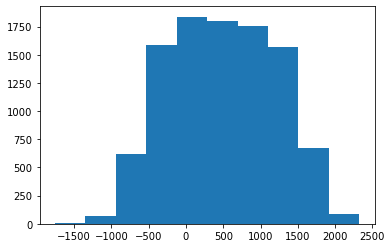

In [17]:
plt.hist(resultadosCC, bins=10)
plt.show()

#### Comparacion de VPN's obtenidas para cada proyecto

In [18]:
### Se hace un conteo de VPN para aquellas que tienen un valor Superior a 0 que determina los proyectos en los que invertir
conteoH = 0 
conteoCC = 0

for inversion in resultadosH:
    if inversion > 0:
        conteoH = conteoH + 1

for inversion in resultadosCC:
    if inversion > 0:
        conteoCC = conteoCC + 1 

print("La cantidad de veces que el Proyecto del Hotel fue rentable para invertir fue de:",conteoH,", siendo un porcentaje del:", conteoH*100/iteraciones,"% del total de simulaciones")
print("La cantidad de veces que el Proyecto del Centro comercial fue rentable para invertir fue de:",conteoCC,", siendo un porcentaje del:", conteoCC*100/iteraciones,"% del total de simulaciones")

La cantidad de veces que el Proyecto del Hotel fue rentable para invertir fue de: 5541 , siendo un porcentaje del: 55.41 % del total de simulaciones
La cantidad de veces que el Proyecto del Centro comercial fue rentable para invertir fue de: 7177 , siendo un porcentaje del: 71.77 % del total de simulaciones


Como se pudo observar en los resultados:
- **El proyecto del Hotel fue rentable entre un 50% y un 55% de las veces que se realizó las simulaciones en distintas cantidades**
- **El proyecto del Centro Comercial fue rentable entre un 65% y 75% de las veces que se realizó las simulaciones en distintas cantidades**

También al observar los resultados de los histogramas, es posible observar que el proyecto del Hotel siempre tuvo simulaciones en las que el VPN era mayor que las del proyecto del Centro Comercial, pero gracias a los resultados anteriores, es posible determinar que **es más rentable invertir en el Proyecto del Centro Comercial**, debido a que la probabilidad de que al VPN sea mayor a 0 es mayor que la probabilidad el proyecto del Hotel, lo cual lo hace un proyecto menos riesgoso y con más probabilidad de obtener ganancias.

### Ejercicio 4